Gravimetrik ma'lumotlar:
          X    Y         G
0  0.000000  0.0  9.850000
1  1.010101  0.0  9.855042
2  2.020202  0.0  9.860032
3  3.030303  0.0  9.864921
4  4.040404  0.0  9.869657


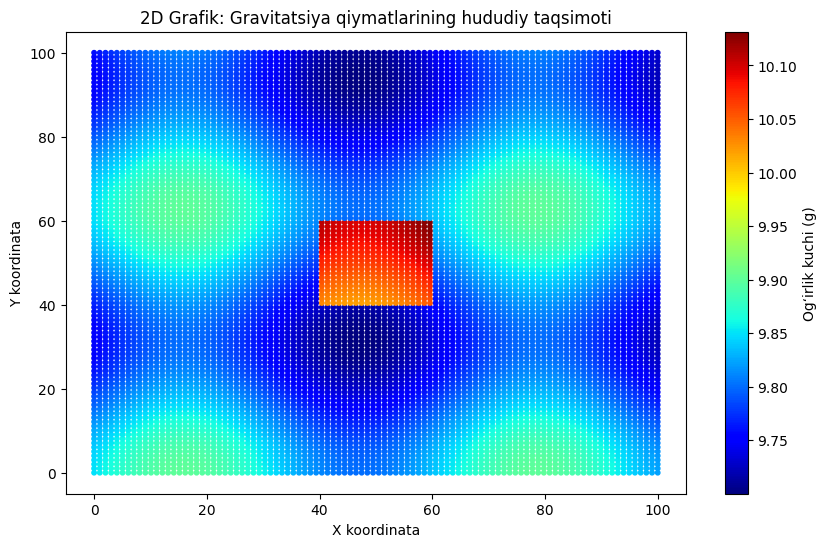

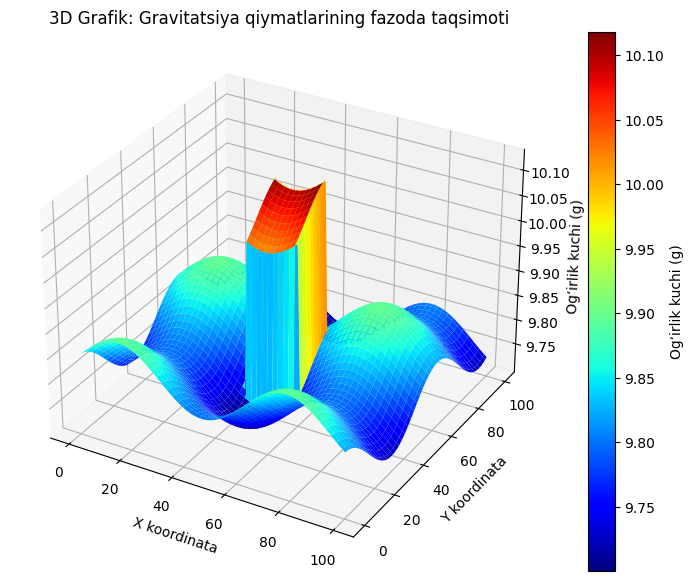


Foydali qazilmalar joylashuvi:
              X         Y          G
4040  40.404040  40.40404  10.029744
4041  41.414141  40.40404  10.026804
4042  42.424242  40.40404  10.024294
4043  43.434343  40.40404  10.022238
4044  44.444444  40.40404  10.020657
...         ...       ...        ...
5955  55.555556  59.59596  10.114150
5956  56.565657  59.59596  10.118085
5957  57.575758  59.59596  10.122318
5958  58.585859  59.59596  10.126807
5959  59.595960  59.59596  10.131506

[400 rows x 3 columns]


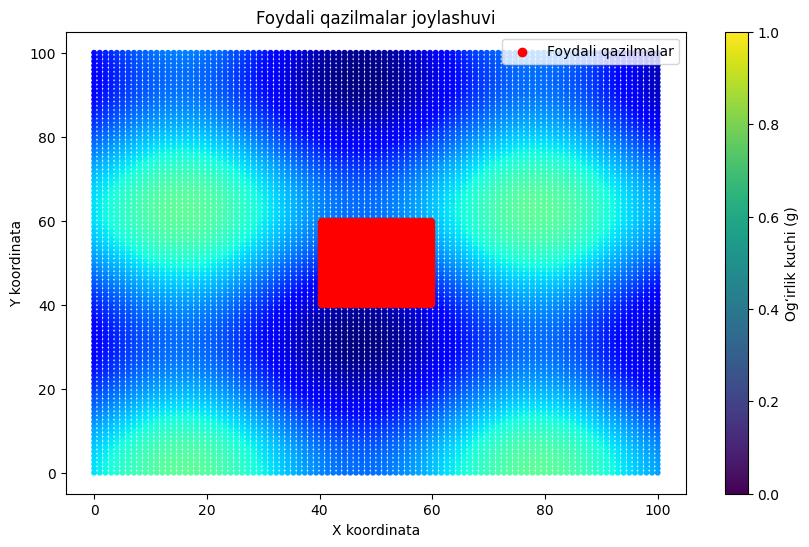

In [2]:
# 1. Kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 2. Ma'lumotlarni tayyorlash
np.random.seed(42)
num_points = 100  # O'lchov nuqtalari soni

# Hudud koordinatalari
x = np.linspace(0, 100, num_points)
y = np.linspace(0, 100, num_points)
x, y = np.meshgrid(x, y)

# Og'irlik kuchi qiymatlarini aniqlash
g = 9.8 + 0.05 * np.sin(x / 10) + 0.05 * np.cos(y / 10)

# Foydali qazilmalar anomaliyalari qo'shish
g[40:60, 40:60] += 0.3  # Yuqori og'irlik kuchi hududi

# Ma'lumotlarni DataFrame ko'rinishiga o'tkazish
data = pd.DataFrame({
    'X': x.ravel(),
    'Y': y.ravel(),
    'G': g.ravel()
})

# Ma'lumotlarning bir qismini ko'rish
print("Gravimetrik ma'lumotlar:")
print(data.head())

# 3. 2D Grafik Yaratish
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], c=data['G'], cmap='jet', s=10)
plt.colorbar(label='Og‘irlik kuchi (g)')
plt.title("2D Grafik: Gravitatsiya qiymatlarining hududiy taqsimoti")
plt.xlabel("X koordinata")
plt.ylabel("Y koordinata")
plt.show()

# 4. 3D Grafik Yaratish
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D Surface grafik
surf = ax.plot_surface(x, y, g, cmap='jet', edgecolor='none')

# Grafik parametrlarini belgilash
ax.set_title("3D Grafik: Gravitatsiya qiymatlarining fazoda taqsimoti")
ax.set_xlabel("X koordinata")
ax.set_ylabel("Y koordinata")
ax.set_zlabel("Og‘irlik kuchi (g)")
fig.colorbar(surf, ax=ax, label='Og‘irlik kuchi (g)')

plt.show()

# 5. Foydali Qazilmalarni Aniqlash (Muvozanat tahlili)
threshold = g.mean() + 0.15  # Anomaliya chegarasi
anomaly = data[data['G'] > threshold]  # Anomaliyalar

print("\nFoydali qazilmalar joylashuvi:")
print(anomaly)

# Anomaliyalarni 2D grafikda ko'rsatish
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], c=data['G'], cmap='jet', s=10)
plt.scatter(anomaly['X'], anomaly['Y'], color='red', label='Foydali qazilmalar')
plt.colorbar(label='Og‘irlik kuchi (g)')
plt.title("Foydali qazilmalar joylashuvi")
plt.xlabel("X koordinata")
plt.ylabel("Y koordinata")
plt.legend()
plt.show()

# # 6. Animatsiya Yaratish
# fig, ax = plt.subplots(figsize=(10, 6))
# sc = ax.scatter([], [], c=[], cmap='jet', s=10)

# ax.set_xlim(0, 100)
# ax.set_ylim(0, 100)
# ax.set_title("Animatsiya: Og‘irlik kuchi o‘zgarishi")
# ax.set_xlabel("X koordinata")
# ax.set_ylabel("Y koordinata")

# # Animatsiya funksiyasi
# def update(frame):
#     current_data = data.iloc[:frame*100]  # Qadamli ko'rsatish
#     sc.set_offsets(np.c_[current_data['X'], current_data['Y']])
#     sc.set_array(current_data['G'])
#     return sc,

# # Animatsiya yaratish
# ani = FuncAnimation(fig, update, frames=10, interval=500, repeat=False)
# plt.show()

# # 7. Hisobot tayyorlash
# print("\nGravitatsiya qiymatlari statistikasi:")
# print(data['G'].describe())

# print(f"\nFoydali qazilmalar aniqlangan nuqtalar soni: {len(anomaly)}")
# print("Aniqlangan foydali qazilmalar koordinatalari:")
# print(anomaly[['X', 'Y', 'G']])
